# Load Packages

In [2]:
import os
import sys

In [3]:
from dotenv import load_dotenv
# Load Session Id vom .env file to environment variables
load_dotenv()

True

In [4]:
# Append the path to the exploratory-analysis package and import
sys.path.append(os.environ.get('PATH_EXPLORATORY_ANALYSIS'))

In [5]:
import exploratory_analysis as ea

# Load Data

In [6]:
data_folder_path=os.environ.get('DATA_PATH_GENERAL')
telco_data_path=os.path.join(data_folder_path,"WA_Fn-UseC_-Telco-Customer-Churn.csv")

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [32]:
# Import data
df = ea.import_to_pds(telco_data_path)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df=df.drop(columns=["customerID"])

In [34]:
basic_analysis_result=ea.basic_analysis_df(df)
df_basic_analysis=basic_analysis_result["df_info"]
num_cols=basic_analysis_result["num_cols"]
num_rows=basic_analysis_result["num_rows"]

In [9]:
print("Result basic analysis:")
print(df_basic_analysis.to_markdown())
print(f"\nNumber of data: {num_rows}")
print(f"Number of columns: {num_cols}")

Result basic analysis:
|    | col_nm           | type    |   num_unique |   num_null |
|---:|:-----------------|:--------|-------------:|-----------:|
|  0 | gender           | object  |            2 |          0 |
|  1 | SeniorCitizen    | int64   |            2 |          0 |
|  2 | Partner          | object  |            2 |          0 |
|  3 | Dependents       | object  |            2 |          0 |
|  4 | tenure           | int64   |           73 |          0 |
|  5 | PhoneService     | object  |            2 |          0 |
|  6 | MultipleLines    | object  |            3 |          0 |
|  7 | InternetService  | object  |            3 |          0 |
|  8 | OnlineSecurity   | object  |            3 |          0 |
|  9 | OnlineBackup     | object  |            3 |          0 |
| 10 | DeviceProtection | object  |            3 |          0 |
| 11 | TechSupport      | object  |            3 |          0 |
| 12 | StreamingTV      | object  |            3 |          0 |
| 13 | StreamingM

In [35]:
#Columns to one-hot-encode 
li_one_hot=[col for col in df.columns if col not in ["churn","MonthlyCharges","TotalCharges"] ]
one_hot_result=ea.one_hot_encode(df_input=df,li_one_hot=li_one_hot)
df=one_hot_result["df_result"]
dummies_dict=one_hot_result["dummies_dict"]

In [36]:
CorrelationFeatures=ea.CorrelationFeatures(df_input=df,dummies_dict=dummies_dict).filter_correlations(threshold_absolute_correlation=0.4)

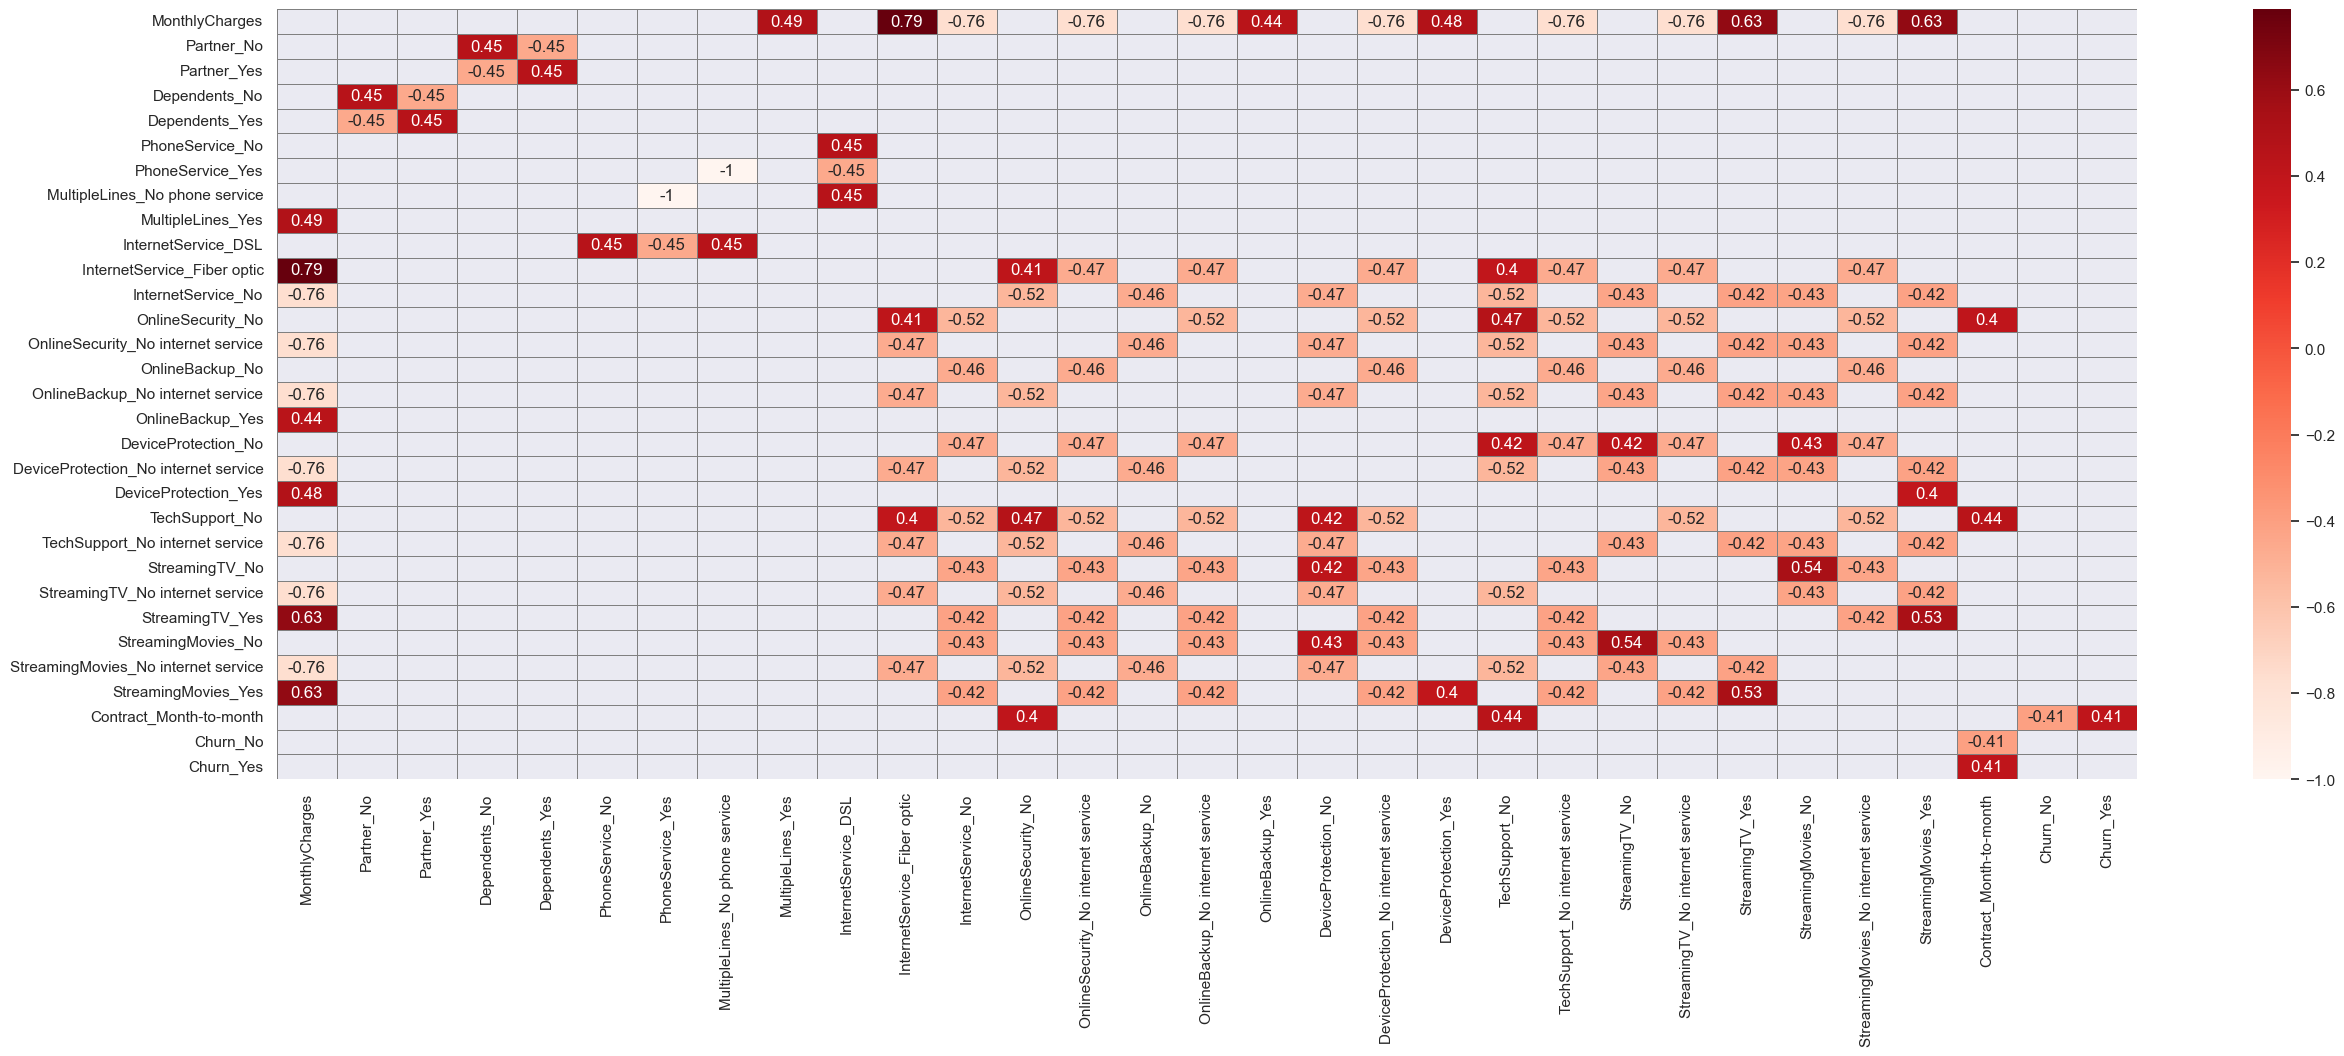

In [22]:
CorrelationFeatures.show_heat_map()

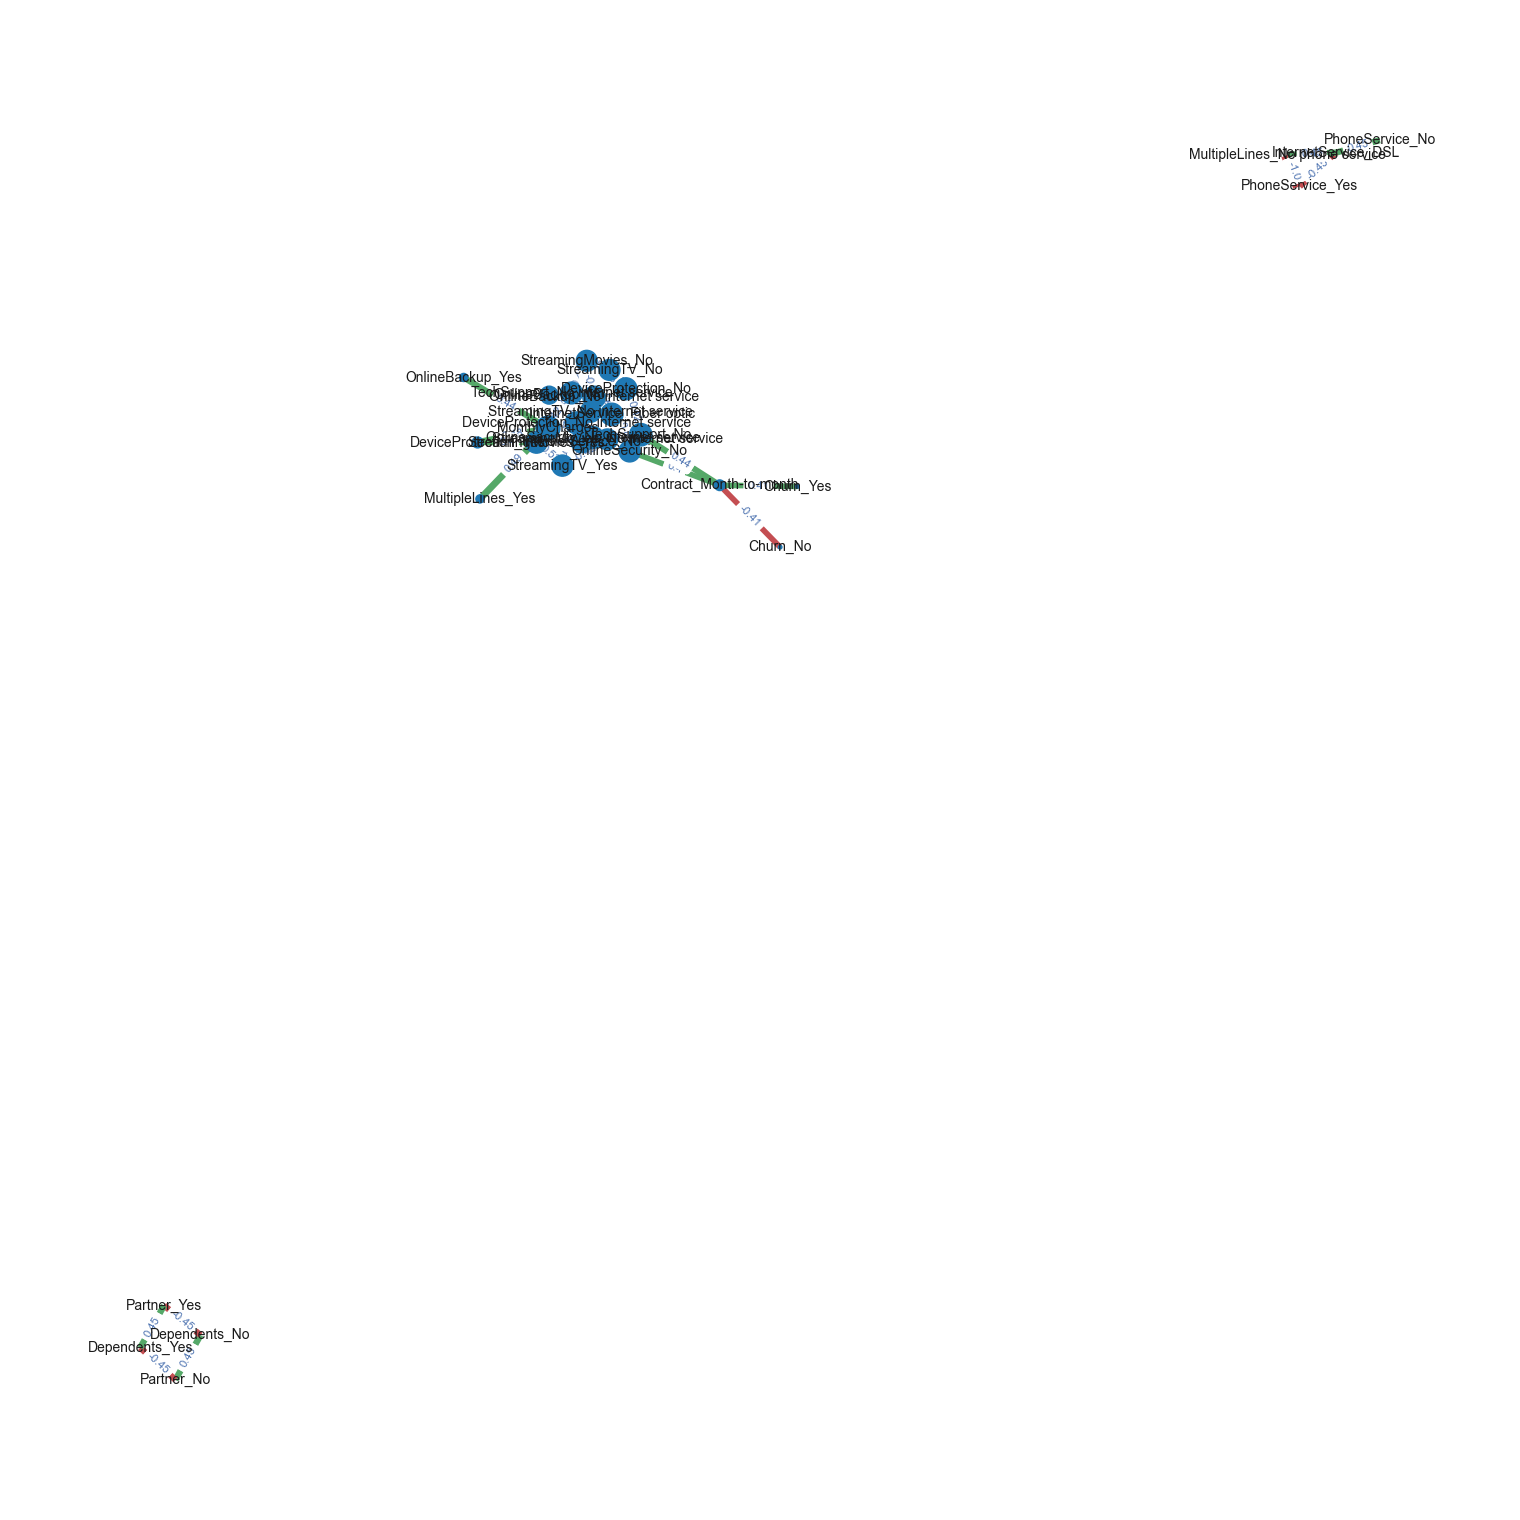

In [24]:
CorrelationFeatures.show_correlation_graph()

In [38]:
df

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,29.85,29.85,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,56.95,1889.5,0,1,1,0,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,53.85,108.15,0,1,1,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,42.30,1840.75,0,1,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,70.70,151.65,1,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.5,0,1,1,0,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
7039,103.20,7362.9,1,0,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7040,29.60,346.45,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,74.40,306.6,0,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


In [37]:
ea.FeatureSelector(df=df,target="churn",num_feature_keep=5).result_table

KeyError: 'churn'